In [270]:
import pandas as pd
import numpy as np

In [271]:
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\train.csv (1)\\train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* ***In our dataset, we have a total of 785 columns. One of these columns is the label column, which contains the target variable (Y). The remaining 784 columns are the features, which represent the pixel values of a 28x28 image.***
* ***Each row in our dataset represents one image. The 784 feature columns together form the pixel values of the image. By reshaping these 784 values into a 28x28 grid, we can reconstruct the original image.***

In [272]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [273]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

* ***Our dataset does not contain any missing values, and the distribution of data across different categories or classes is fairly balanced.***

In [274]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [275]:
max(x[2])

255

In [276]:
x=x/255
max(x[1])

1.0

* ***What I've done is rescale the pixel values to fall within the range of 0 to 1. This normalization process involves dividing each pixel value by the maximum pixel value (typically 255 for grayscale images). By scaling the pixel values to this range, it helps improve the efficiency of the model during training.***

### ***Now, let's visualize how the handwritten images look.***
* ***Since we have a large number of images, I'll randomly select 50 images and plot them.***

In [277]:
import matplotlib.pyplot as plt

Let's Visualize random 50 values

In [278]:
sample=df.sample(50)

In [279]:
sample=df.sample(50)
pixel_val=sample.iloc[:,1:].values
pixel_val


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [280]:
actual_digits=sample.iloc[:,0].values
actual_digits

array([7, 8, 7, 3, 1, 9, 6, 0, 3, 0, 9, 4, 1, 9, 2, 0, 8, 8, 2, 1, 6, 3,
       0, 5, 0, 5, 1, 0, 8, 4, 5, 7, 7, 1, 8, 3, 1, 1, 6, 8, 2, 3, 1, 8,
       6, 8, 4, 3, 2, 1], dtype=int64)

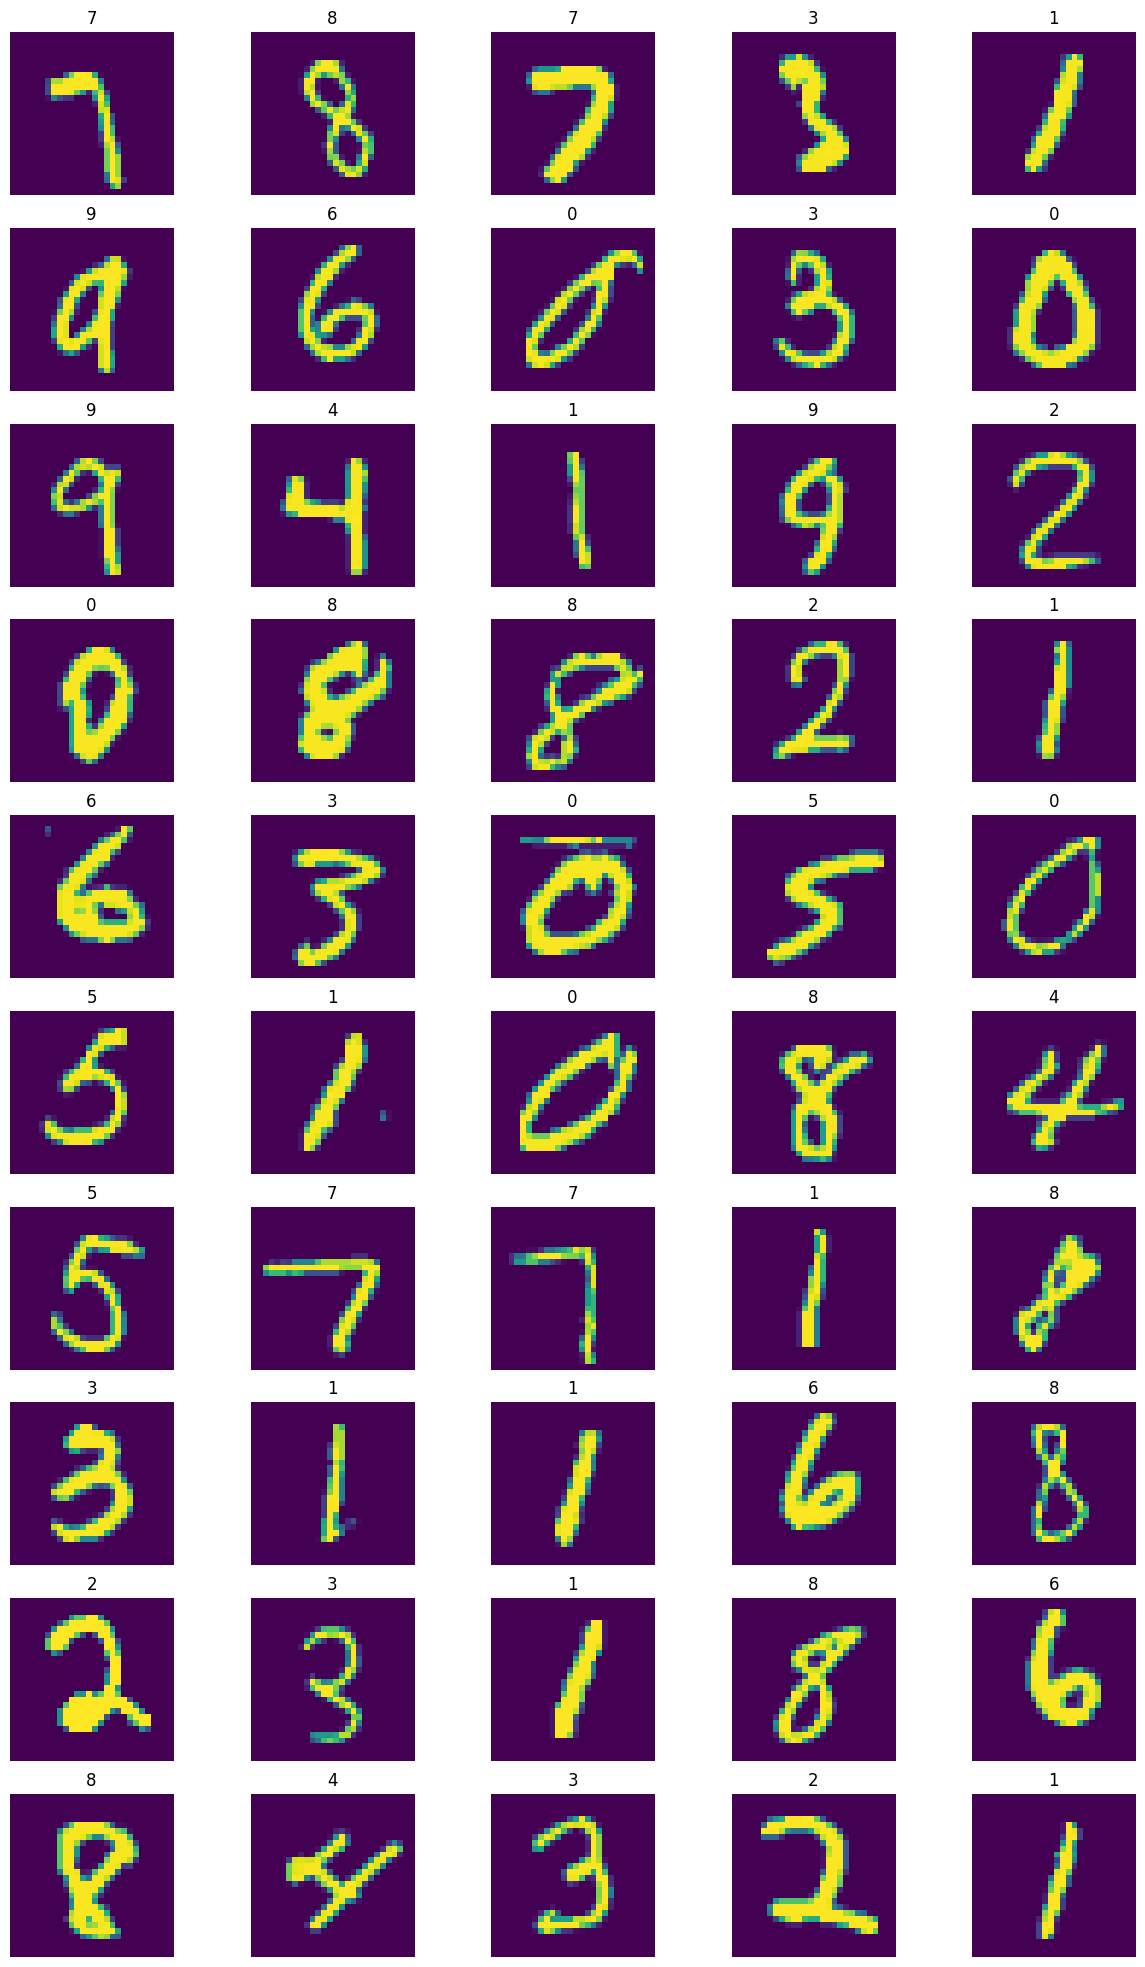

In [281]:
fig,axes=plt.subplots(10,5,figsize=(15,25))
for i in range(50):
    row=i//5
    col=i%5
    axes[row,col].imshow(pixel_val[i].reshape(28,28))
    axes[row,col].set_title(actual_digits[i])
    axes[row, col].axis('off')
    
    
    

In [282]:
from sklearn.model_selection import train_test_split


In [283]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [284]:
x_train.shape

(33600, 784)

In [285]:
y_train.shape

(33600,)

In [286]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [287]:
model=Sequential()
model.add(Dense(75,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [288]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [289]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 75)                58875     
                                                                 
 dense_110 (Dense)           (None, 50)                3800      
                                                                 
 dense_111 (Dense)           (None, 20)                1020      
                                                                 
 dense_112 (Dense)           (None, 10)                210       
                                                                 
Total params: 63905 (249.63 KB)
Trainable params: 63905 (249.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [290]:
history=model.fit(x_train,y_train,epochs=15,batch_size=32,validation_split=0.2)

Epoch 1/15
840/840 [==============================] - 3s 3ms/step - loss: 0.4473 - accuracy: 0.8620 - val_loss: 0.2516 - val_accuracy: 0.9251
Epoch 2/15
840/840 [==============================] - 2s 2ms/step - loss: 0.1749 - accuracy: 0.9478 - val_loss: 0.1630 - val_accuracy: 0.9534
Epoch 3/15
840/840 [==============================] - 2s 2ms/step - loss: 0.1230 - accuracy: 0.9628 - val_loss: 0.1371 - val_accuracy: 0.9607
Epoch 4/15
840/840 [==============================] - 2s 3ms/step - loss: 0.0962 - accuracy: 0.9708 - val_loss: 0.1191 - val_accuracy: 0.9676
Epoch 5/15
840/840 [==============================] - 2s 2ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.1209 - val_accuracy: 0.9667
Epoch 6/15
840/840 [==============================] - 2s 3ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.1310 - val_accuracy: 0.9643
Epoch 7/15
840/840 [==============================] - 2s 2ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.1268 - val_accuracy: 0.9677
Epoch 

In [291]:
history.history

{'loss': [0.44734668731689453,
  0.1748931109905243,
  0.12304949015378952,
  0.09622485935688019,
  0.07616683095693588,
  0.06269244104623795,
  0.05296175181865692,
  0.04594104737043381,
  0.03376004844903946,
  0.03665954992175102,
  0.02572639472782612,
  0.018626123666763306,
  0.026946892961859703,
  0.020686762407422066,
  0.017324207350611687],
 'accuracy': [0.8619791865348816,
  0.9478050470352173,
  0.9627976417541504,
  0.9708333611488342,
  0.9763020873069763,
  0.9805431365966797,
  0.9833333492279053,
  0.9852678775787354,
  0.9890252947807312,
  0.9870163798332214,
  0.991592288017273,
  0.9941964149475098,
  0.9911830425262451,
  0.9928571581840515,
  0.9943452477455139],
 'val_loss': [0.2515621781349182,
  0.16303712129592896,
  0.13705295324325562,
  0.1191115528345108,
  0.12085658311843872,
  0.13095791637897491,
  0.12676887214183807,
  0.13307882845401764,
  0.15505026280879974,
  0.17102766036987305,
  0.15902099013328552,
  0.1551102250814438,
  0.148694485425

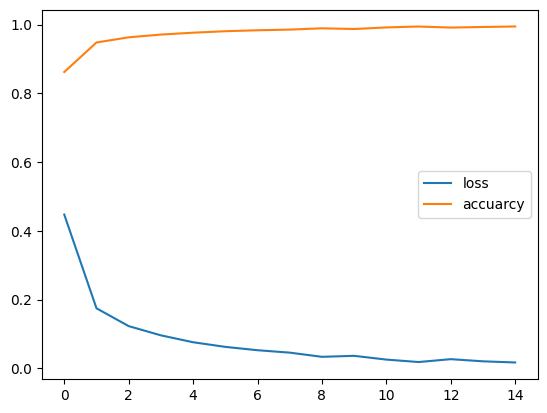

In [292]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuarcy')
plt.legend()
plt.show()

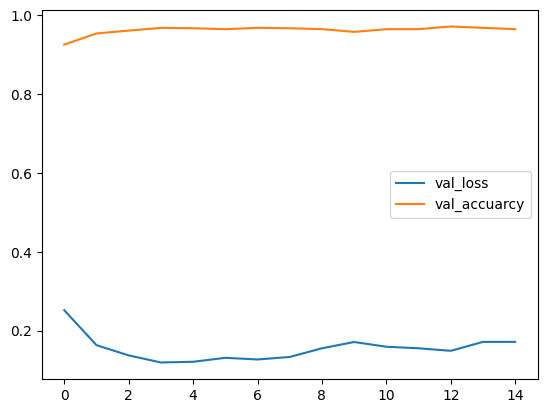

In [293]:
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_accuarcy')
plt.legend()
plt.show()

In [294]:
prediction=model.predict(x_test)


263/263 [==============================] - 0s 1ms/step


In [295]:
y_pred=prediction.argmax(axis=1)
y_pred

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [296]:
model.evaluate(x_test,y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.1800 - accuracy: 0.9598


[0.17996686697006226, 0.959761917591095]